# Analysis for project 1

Run PCA, MDS, t-SNE, and UMAP on TCGA gene expression data. Inspect variation of metadata features across reduced dimensions.

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
from umap import UMAP

## Read and clean the data

In [2]:
# read expression data
expr = pd.read_csv('data/TCGA.HNSC.expression.txt', sep='\t', header=0, index_col=[0,1])
print("expression data shape: ", expr.shape)
expr.head()[0:5]

expression data shape:  (545, 20531)


,,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009
patient_id,sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J,TCGA-4P-AA8J-01A-11R-A39I-07,0.0,3.1490,12.8732,122.939,1429.060,0.0,266.2150,0.0000,0.0,0.0,...,281.861,695.116,24.6495,150.362,732.091,7.3949,419.042,11611.80,881.220,358.650
TCGA-BA-4074,TCGA-BA-4074-01A-01R-1436-07,0.0,12.8563,11.8081,336.165,1927.680,0.0,39.3089,0.0000,0.0,0.0,...,2132.460,1193.140,23.8937,172.266,380.372,4.6246,805.062,2516.93,258.591,1088.320
TCGA-BA-4075,TCGA-BA-4075-01A-01R-1436-07,0.0,12.3168,3.7626,347.812,1492.700,0.0,77.7167,0.0000,0.0,0.0,...,761.002,673.188,20.9031,172.049,562.240,1.6079,487.740,5930.05,292.644,980.303
TCGA-BA-4076,TCGA-BA-4076-01A-01R-1436-07,0.0,12.4833,4.3080,278.017,1205.820,0.0,112.2920,0.5247,0.0,0.0,...,480.068,1032.660,47.2255,324.282,1440.900,35.1568,722.550,2674.54,672.176,998.557
TCGA-BA-4077,TCGA-BA-4077-01B-01R-1436-07,0.0,12.4543,11.6073,321.545,853.706,0.0,48.1232,0.0000,0.0,0.0,...,1325.310,1620.310,44.7546,210.780,1423.000,52.9355,770.934,8035.61,763.234,692.974


In [3]:
# read meta data
meta = pd.read_csv('data/TCGA.HNSC.metadata.txt', sep='\t', header=0, index_col=0)
print("meta data shape: ", meta.shape)
meta.head()

meta data shape:  (500, 18)


,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,histological_type,histological_grade,tumor_status,vital_status,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
patient_id,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J,HNSC,66.0,MALE,BLACK OR AFRICAN AMERICAN,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,TUMOR FREE,Alive,0.0,102.0,0.0,102.0,NaN,NaN,0.0,102.0,NaN
TCGA-BA-4074,HNSC,69.0,MALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G3,WITH TUMOR,Dead,1.0,462.0,1.0,462.0,NaN,NaN,1.0,396.0,NaN
TCGA-BA-4075,HNSC,49.0,MALE,BLACK OR AFRICAN AMERICAN,Stage III,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,283.0,1.0,283.0,NaN,NaN,1.0,236.0,NaN
TCGA-BA-4076,HNSC,39.0,MALE,WHITE,[Not Available],Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,415.0,1.0,415.0,NaN,NaN,1.0,286.0,NaN
TCGA-BA-4077,HNSC,45.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,1134.0,1.0,1134.0,NaN,NaN,1.0,1134.0,NaN


In [4]:
# get meta data per sample
meta = expr.reset_index()[['patient_id','sample_id']].join(meta, on='patient_id')
print("meta data shape: ", meta.shape)
meta.head()

meta data shape:  (545, 20)


,patient_id,sample_id,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,histological_type,histological_grade,tumor_status,vital_status,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
0,TCGA-4P-AA8J,TCGA-4P-AA8J-01A-11R-A39I-07,HNSC,66.0,MALE,BLACK OR AFRICAN AMERICAN,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,TUMOR FREE,Alive,0.0,102.0,0.0,102.0,NaN,NaN,0.0,102.0,NaN
1,TCGA-BA-4074,TCGA-BA-4074-01A-01R-1436-07,HNSC,69.0,MALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G3,WITH TUMOR,Dead,1.0,462.0,1.0,462.0,NaN,NaN,1.0,396.0,NaN
2,TCGA-BA-4075,TCGA-BA-4075-01A-01R-1436-07,HNSC,49.0,MALE,BLACK OR AFRICAN AMERICAN,Stage III,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,283.0,1.0,283.0,NaN,NaN,1.0,236.0,NaN
3,TCGA-BA-4076,TCGA-BA-4076-01A-01R-1436-07,HNSC,39.0,MALE,WHITE,[Not Available],Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,415.0,1.0,415.0,NaN,NaN,1.0,286.0,NaN
4,TCGA-BA-4077,TCGA-BA-4077-01B-01R-1436-07,HNSC,45.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,1134.0,1.0,1134.0,NaN,NaN,1.0,1134.0,NaN


We have 545 samples from 500 patients. 20531 features (genes) were quantified from each sample

## Inspect mean-variance relationship of features

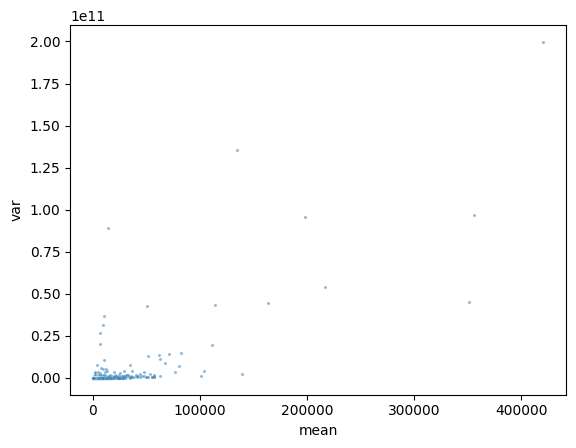

In [18]:
mean_var = pd.DataFrame()
mean_var['mean'] = expr.mean(axis=0)
mean_var['var'] = expr.var(axis=0)
f = sns.scatterplot(data=mean_var, x='mean', y='var', s = 5, alpha=0.5)

[None, None]

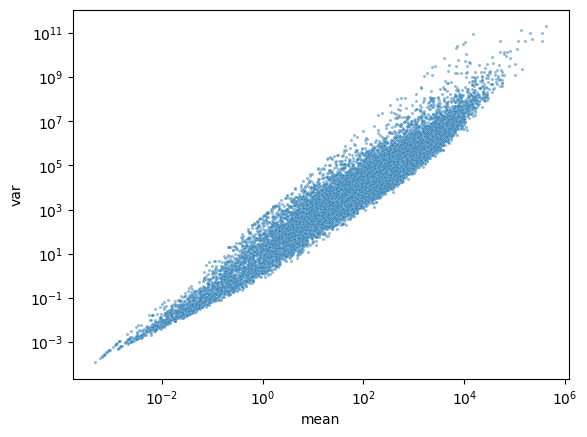

In [20]:
# log transform axes to see more clearly
f = sns.scatterplot(data=mean_var, x='mean', y='var', s = 5, alpha=0.5)
f.set(xscale="log", yscale="log")

Data is heteroscedastic. We will need to stabilize the variance of the data before proceeding.

<Axes: xlabel='mean', ylabel='var'>

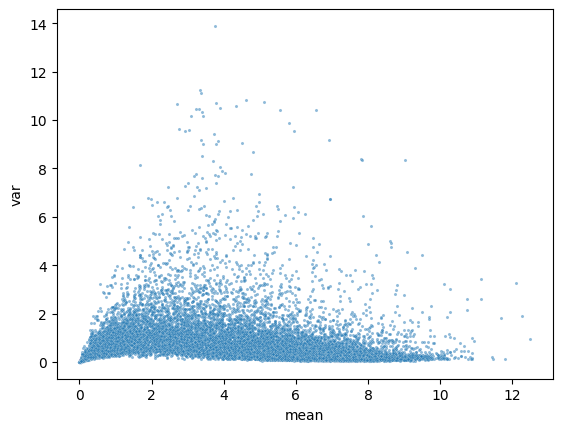

In [15]:
# log1p transform expression data (can't use log because of zeros)
expr_norm = expr.apply(lambda x: np.log1p(x), axis=0)
mean_var['mean'] = expr_norm.mean(axis=0)
mean_var['var'] = expr_norm.var(axis=0)
sns.scatterplot(data=mean_var, x='mean', y='var', s = 5, alpha=0.5)

<Axes: xlabel='mean', ylabel='var'>

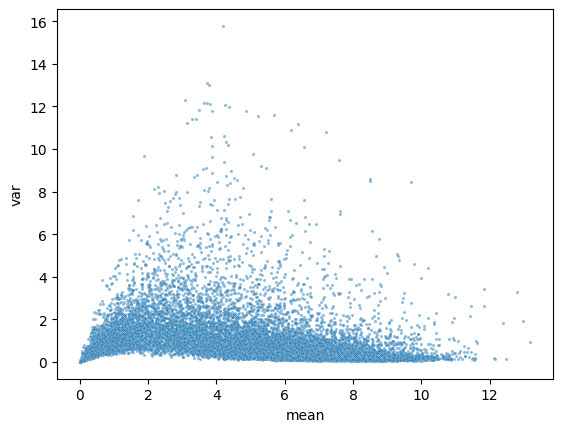

In [21]:
# arcSinh transform expression data, won't inflate zeros as much as log1p
expr_norm = expr.apply(lambda x: np.arcsinh(x), axis=0)
mean_var['mean'] = expr_norm.mean(axis=0)
mean_var['var'] = expr_norm.var(axis=0)
sns.scatterplot(data=mean_var, x='mean', y='var', s = 5, alpha=0.5)

## Define class to iteratively analyze the expression data

In [85]:
class Dataset:
	def __init__(self, expr, meta):
		self.expr = expr
		self.meta = meta
	def normalize(self, func):
		print("normalizing expression data using: ", func.__name__)
		self.expr_norm = self.expr.apply(lambda x: func(x), axis=0)
	def scale(self):
		print("scaling and centering expression data")
		self.expr_norm_scale = pd.DataFrame(scale(self.expr_norm), index=self.expr_norm.index, columns=self.expr_norm.columns)
	def embed(self, func, **kwargs):
		print("embedding expression data using: ", func.__name__)
		self.embedding = func(**kwargs).fit_transform(self.expr_norm_scale)
		self.embedding = pd.DataFrame(self.embedding, index=self.expr_norm_scale.index.get_level_values(1))
		self.embedding = self.embedding.join(self.meta.set_index('sample_id'), on=['sample_id'])
		return self
	def plot(self, dims=[0,1], **kwargs):
		f = sns.pairplot(self.embedding, vars=dims, **kwargs)
		return f

## Test each dimensionality reduction method

In [78]:
data = Dataset(expr, meta)
data.normalize(np.arcsinh)
data.scale()

normalizing expression data using:  arcsinh
scaling and centering expression data


embedding expression data using:  PCA


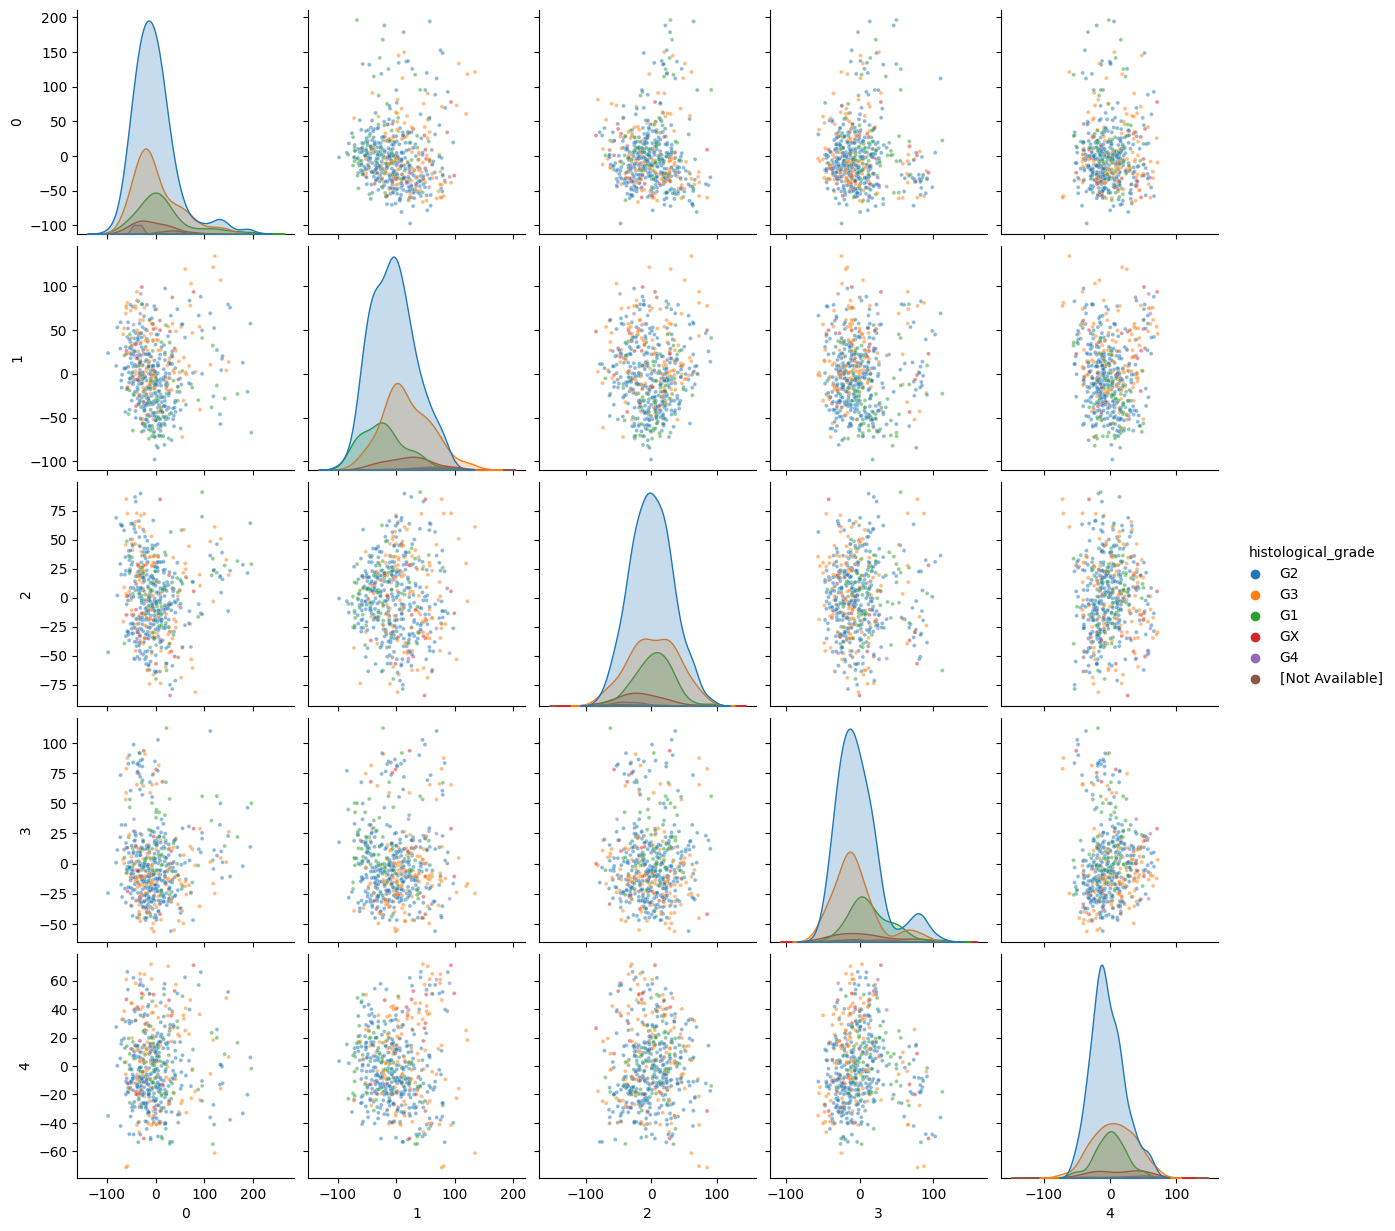

In [91]:
# get 50 PCs (takes ~ 30 sec)
pca = data.embed(PCA, n_components=50)
pca.plot(dims = [0,1,2,3,4], hue="histological_grade", plot_kws={"s": 8, "alpha": 0.5})

embedding expression data using:  MDS


/Users/mcuoco/projects/ece204_project1/.venv/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


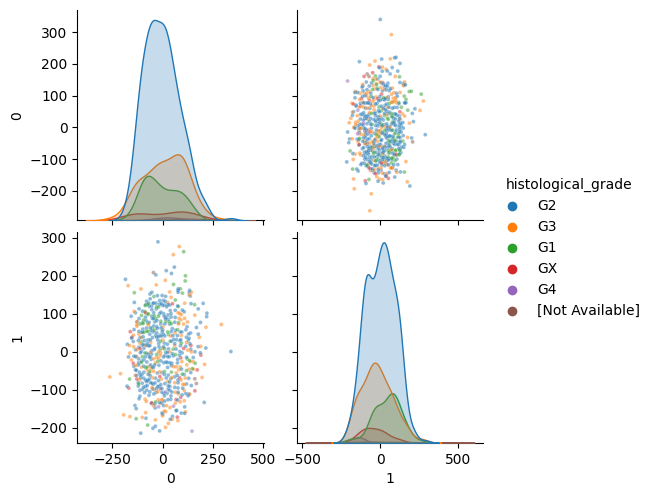

In [93]:
mds = data.embed(MDS)
mds.plot(dims = [0,1], hue="histological_grade", plot_kws={"s": 8, "alpha": 0.5})

embedding expression data using:  UMAP


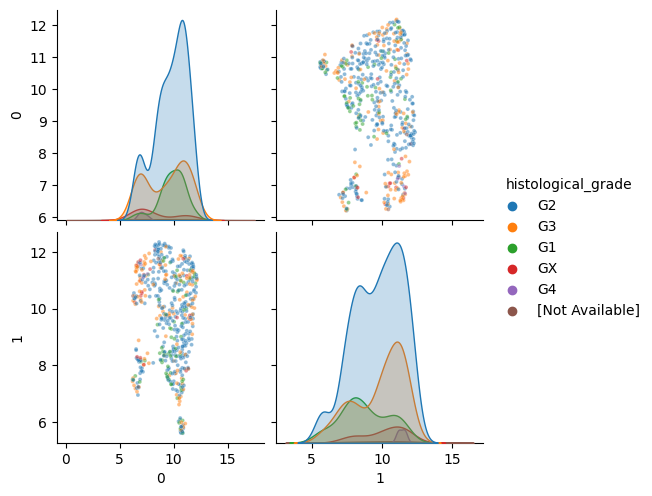

In [94]:
umap = data.embed(UMAP)
umap.plot(dims = [0,1], hue="histological_grade", plot_kws={"s": 8, "alpha": 0.5})

embedding expression data using:  TSNE


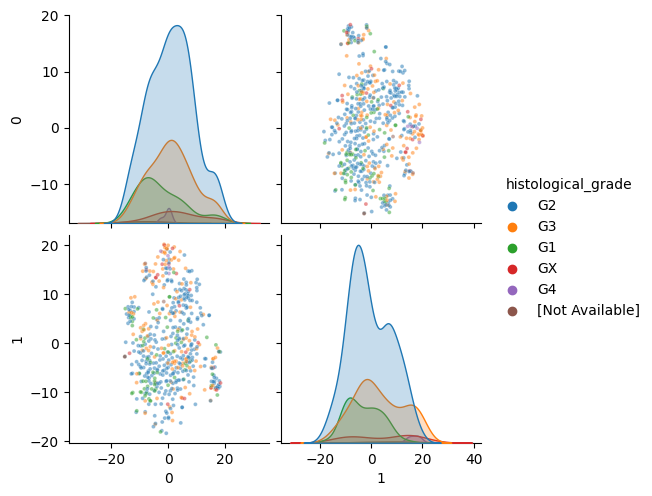

In [95]:
tsne = data.embed(TSNE)
tsne.plot(dims = [0,1], hue="histological_grade", plot_kws={"s": 8, "alpha": 0.5})